# 1. Preprocessing

### 1-1. Import Library

In [5]:
# Data Preprocessing Package
import pandas as pd
import os

# Visualization Package
import matplotlib.pyplot as plt
import seaborn as sns

# Etc Package
import statistics as st

### 1-2. Define Path

In [12]:
"""
해당 셀은 기본적인 경로를 정의하는 셀입니다. 
본인의 환경에 맞춰 경로를 정의하면 됩니다.
"""

# 기본 저장 주소
ROOT_PATH = "./Topic_Modeling/"

# 결과물 저장 주소
RESULT_FOLDER = os.path.join(ROOT_PATH,"3.Result/")
RESULT_TOPIC_EXCEL = os.path.join(RESULT_FOLDER,"Result_topic_excel_weight.xlsx")
FONT_PATH = os.path.join(ROOT_PATH,"NanumBarunGothic.ttf")

RESULT_SAVE_ISSUETRACKING1 = os.path.join(RESULT_FOLDER,"Lineplot of Issuetracking.jpg")
RESULT_SAVE_ISSUETRACKING2 = os.path.join(RESULT_FOLDER,"Heatmap of Issuetracking.jpg")

### 1-3. Load and Handle Data

In [14]:
"""
해당 셀은 데이터를 불러오고 이슈트레킹 과제에 맞도록 새로운 데이터 프레임을 생성하는 셀입니다.
"""
DF_OLD = pd.read_excel(RESULT_TOPIC_EXCEL, index_col=0)

# 불필요한 퀄럼 삭제
DF_NEW = DF_OLD.drop(['title','Dominant_Topic','Topic_Perc_Contrib'], axis=1)
 
# 날짜를 기준으로 정렬하고 정렬된 순서대로 재색인
DF_NEW = DF_NEW.sort_values(by=['day'], axis=0)  # 날짜를 기준으로 정렬
DF_NEW = DF_NEW.reset_index(drop=True) # 날짜를 기준으로 재색인

# 연-월로 바꾸고 중복 제거
year_month_list=[]
for i in range(len(DF_NEW)):
    year_month_list.append(str(DF_NEW['day'][i])[0:7]) #데이터프레임 -> 리스트
DF_NEW['year_month'] = year_month_list #리스트 -> 데이터프레임 추가

DF_NEW

,day,content,view,hit,title_body,text_pre,Document_No,Keywords,Text,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,year_month
0,2020-01-01,ㅋㅋㅋㅋㅋㅋㅋㅋㅋ사지마라 손해다 미칭 넥레기들 돈**쳣구만 겜개선이나쳐해 저런 정신...,"2,692",2,이번 9900개 패키지사면 호갱이들 ㅋㅋㅋㅋㅋㅋㅋㅋㅋ ㅋㅋㅋㅋㅋㅋㅋㅋㅋ사지마라 손해...,이번 9900개 패키지사면 호갱이들 사지마라 손해다 미칭 넥레기들 돈 쳣구만 겜개선...,17231,"보상, 패키지, 스쿼드, 이벤트, 업데이트, 카드, 귀속, 버닝, 아이폰, 프로","['패키지', '사면', '손해', '미칭', '기들', '개선', '정신', '패...",0.019021,0.171456,0.041975,0.031897,0.417407,0.041837,0.124142,0.078519,0.031241,0.042505,2020-01
1,2020-01-01,어떤가요,"1,581",0,이렇게 레알 맞출꺼같은데 어떤가요,이렇게 레알 맞출꺼같은데 어떤가요,17221,"선수, 시즌, 보정, 정도, 문제, 상대, 시세, 패치, 경기, 출시",['가요'],0.114651,0.205241,0.070895,0.053908,0.108587,0.070635,0.124414,0.127866,0.052791,0.071011,2020-01
2,2020-01-01,일단 9000~10000fc 있어여,1975,0,이번 패키지 뭐 살까요? 일단 9000~10000fc 있어여,이번 패키지 뭐 살까요 일단 9000 10000 있어여,17222,"선수, 시즌, 보정, 정도, 문제, 상대, 시세, 패치, 경기, 출시",['패키지'],0.032015,0.205241,0.070895,0.053908,0.191222,0.070635,0.124414,0.127866,0.052791,0.071011,2020-01
3,2020-01-01,??,3390,1,방금 뽑앗는데 이거 팔릴까요? ??,방금 뽑앗는데 이거 팔릴까요,17223,"선수, 시즌, 보정, 정도, 문제, 상대, 시세, 패치, 경기, 출시",[],0.034899,0.223729,0.077281,0.058764,0.118368,0.076998,0.135622,0.139384,0.057546,0.077408,2020-01
4,2020-01-01,황희찬 ng 시즌 지금 사는게 좋나요 나중에 사는게 좋나요,1996,0,황희찬ng시즌 황희찬 ng 시즌 지금 사는게 좋나요 나중에 사는게 좋나요,황희찬 시즌 황희찬 시즌 지금 사는게 좋나요 나중에 사는게 좋나요,17224,"선수, 시즌, 보정, 정도, 문제, 상대, 시세, 패치, 경기, 출시","['황희', '시즌', '황희', '시즌', '나중']",0.024063,0.278477,0.115381,0.040517,0.081613,0.053089,0.217707,0.096104,0.039677,0.053372,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17227,2021-09-11,얼마나 더 오를까요 ..??,309,0,ebs 로랑 코시엘니 은카 얼마나 더 오를까요 ..??,로랑 코시엘니 은카 얼마나 더 오를까요,4,"선수, 시즌, 보정, 정도, 문제, 상대, 시세, 패치, 경기, 출시","['로랑', '코시엘니', '은카']",0.031968,0.204755,0.070929,0.138001,0.108380,0.070543,0.124226,0.127597,0.052716,0.070886,2021-09
17228,2021-09-11,19시즌 잉글랜드 풀백 금카 있는데 알파 당연히 불가능이겠죠?,100,0,알파 19시즌 잉글랜드 풀백 금카 있는데 알파 당연히 불가능이겠죠?,알파 19시즌 잉글랜드 풀백 금카 있는데 알파 당연히 불가능이겠죠,3,"가격, 아이콘, 가능, 20토티, 금카, 토티, 은카, 오버롤, 기준, 19토티","['알파', '19시즌', '잉글랜드', '풀백', '금카', '알파', '가능']",0.022648,0.203586,0.050208,0.330739,0.076813,0.049971,0.088014,0.090440,0.037349,0.050230,2021-09
17229,2021-09-11,20A 메시 은카 갖고있습니다. 로스터패치하면 오버롤 오르나요?,69,0,20A 메시 로패하면 오버롤 오르나요? 20A 메시 은카 갖고있습니다. 로스터패치하...,20 메시 로패하면 오버롤 오르나요 20 메시 은카 갖고있습니다 로스터패치하면 오버...,2,"크로스, 패스, 중거리, 축구, 굴리트, 키퍼, 에이전트, 개인, 적용, 메시","['20', '메시', '로패', '오버', '은카', '로스터패치', '오버']",0.021405,0.137218,0.047398,0.091287,0.072598,0.047225,0.083180,0.085488,0.090539,0.323662,2021-09
17230,2021-09-11,9000fc로추석 풍년 + 별토끼 3개추석 연쇄 패키지 2개중에 구매하려는데 어떤게...,79,0,패키지 추천 9000fc로추석 풍년 + 별토끼 3개추석 연쇄 패키지 2개중에 구매하...,패키지 추천 9000 로추석 풍년 별토끼 3개추석 연쇄 패키지 2개중에 구매하려는데...,1,"급여, 추천, 강화, 피파4, 버그, 확률, 5카, 3카, 구매, 월클","['패키지', '추천', '9000', '로추', '풍년', '토끼', '3개추석'...",0.022670,0.145256,0.050224,0.038177,0.252625,0.050043,0.262793,0.090530,0.037396,0.050287,2021-09


### 1-4. 이슈트레킹 작업을 위한 빈 변수 생성 

In [15]:
year_month = list(sorted(set(year_month_list)))
temp_pd=pd.DataFrame()
for year in year_month:
    
    temp=DF_NEW[DF_NEW.year_month==year].iloc[:,9:19].reset_index(drop=True) 
    temp_v=temp.values

    for i in range(len(temp_v)):    
        stedv = st.pstdev(temp_v[i]) # 표준편차
        mean = st.mean(temp_v[i]) # 평균
        one_sigma = stedv + mean # 1시그마
        for j in range(len(temp_v[0])):
            if temp_v[i][j]>=one_sigma:
                temp_v[i][j]=1
            else:
                temp_v[i][j]=0
    temp_pd=temp_pd.append(pd.DataFrame(temp_v))

In [16]:
temp_pd.columns=DF_NEW.columns[9:19]

In [17]:
temp_pd.columns

Index(['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6',
       'topic7', 'topic8', 'topic9'],
      dtype='object')

In [18]:
temp_pd=temp_pd.reset_index(drop=True)

In [19]:
DF_ISSUE=pd.concat([DF_NEW[['content','year_month']],temp_pd], axis=1)

In [20]:
DF_ISSUE.to_excel("./Topic_modeling/3.Result/DF_FIFA_ISSUE.xlsx")

In [21]:
DF_ISSUE

,content,year_month,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,ㅋㅋㅋㅋㅋㅋㅋㅋㅋ사지마라 손해다 미칭 넥레기들 돈**쳣구만 겜개선이나쳐해 저런 정신...,2020-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,어떤가요,2020-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,일단 9000~10000fc 있어여,2020-01,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,??,2020-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,황희찬 ng 시즌 지금 사는게 좋나요 나중에 사는게 좋나요,2020-01,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17227,얼마나 더 오를까요 ..??,2021-09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17228,19시즌 잉글랜드 풀백 금카 있는데 알파 당연히 불가능이겠죠?,2021-09,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17229,20A 메시 은카 갖고있습니다. 로스터패치하면 오버롤 오르나요?,2021-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17230,9000fc로추석 풍년 + 별토끼 3개추석 연쇄 패키지 2개중에 구매하려는데 어떤게...,2021-09,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [22]:
"""
해당 셀은 리스트 변수를 자동으로 생성하는 함수를 정의하고 생성합니다.
이슈트레킹의 결과물을 담기 위한 2개의 데이터 프레임을 토픽의 개수만큼 생성합니다. 
"""
topic_number = len(DF_ISSUE.columns)-2

def genrate_list(topic_num):    
    for i in range(0,topic_num):
        globals()['topic{}'.format(i)] = []
        
    return print("topic : {}개의 토픽 리스트를 생성했습니다.".format(topic_num))

genrate_list(topic_number) # 작업용 리스트 생성


"""
아래의 데이터 프레임 설명
DF_FINAL: DF_on_off에서 변환된 문서별 토픽을 월별로 종합하는 데이터 프레임으로 최종 반환합니다. 
"""

DF_FINAL = pd.DataFrame() 
for i in range(0, topic_number):
    DF_FINAL['topic{}'.format(i)]=pd.Series()

topic : 10개의 토픽 리스트를 생성했습니다.


C:\Users\user\Anaconda3\envs\sumin\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [23]:
DF_FINAL

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9


### 1-5. 이슈트레킹을 위한 변환 작업 

In [24]:
"""
1값과 0값을 누적으로 더하여 연/월 토픽 추이를 계산합니다.
"""

year_month = list(sorted(set(year_month_list)))

for i in year_month:
    compare_year_month = DF_ISSUE[DF_ISSUE.year_month==i]
    
    for j in range(0, topic_number):
        topic=compare_year_month['topic{}'.format(j)].sum() 

        globals()['topic{}'.format(j)].append(topic)

'''
assign_var_df : 0,1로 바뀐 토픽을 월별 집계하는 함수 
'''

def assign_var_df(topic_num):
    
    for i in range(0,topic_num):
        DF_FINAL['topic{}'.format(i)] = globals()['topic{}'.format(i)]
        
    return print("월별 토픽 집계가 완료하였습니다.")

assign_var_df(topic_number)

월별 토픽 집계가 완료하였습니다.


In [25]:
DF_FINAL

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,7.0,308.0,23.0,31.0,89.0,23.0,114.0,96.0,17.0,18.0
1,2.0,264.0,12.0,15.0,63.0,17.0,93.0,88.0,17.0,26.0
2,5.0,500.0,34.0,36.0,103.0,30.0,153.0,156.0,20.0,35.0
3,21.0,1060.0,45.0,28.0,292.0,94.0,298.0,493.0,24.0,67.0
4,10.0,768.0,52.0,40.0,184.0,70.0,229.0,212.0,32.0,92.0
5,10.0,529.0,33.0,29.0,117.0,49.0,147.0,138.0,26.0,87.0
6,10.0,632.0,41.0,38.0,127.0,53.0,150.0,177.0,26.0,57.0
7,10.0,779.0,67.0,47.0,186.0,70.0,205.0,222.0,37.0,41.0
8,14.0,607.0,46.0,32.0,139.0,60.0,169.0,175.0,31.0,50.0
9,8.0,673.0,45.0,26.0,144.0,67.0,231.0,158.0,28.0,56.0


In [26]:
DF_FINAL['year']=year_month

In [27]:
DF_FINAL=DF_FINAL.set_index('year')

In [28]:
DF_FINAL

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
year,,,,,,,,,,
2020-01,7.0,308.0,23.0,31.0,89.0,23.0,114.0,96.0,17.0,18.0
2020-02,2.0,264.0,12.0,15.0,63.0,17.0,93.0,88.0,17.0,26.0
2020-03,5.0,500.0,34.0,36.0,103.0,30.0,153.0,156.0,20.0,35.0
2020-04,21.0,1060.0,45.0,28.0,292.0,94.0,298.0,493.0,24.0,67.0
2020-05,10.0,768.0,52.0,40.0,184.0,70.0,229.0,212.0,32.0,92.0
2020-06,10.0,529.0,33.0,29.0,117.0,49.0,147.0,138.0,26.0,87.0
2020-07,10.0,632.0,41.0,38.0,127.0,53.0,150.0,177.0,26.0,57.0
2020-08,10.0,779.0,67.0,47.0,186.0,70.0,205.0,222.0,37.0,41.0
2020-09,14.0,607.0,46.0,32.0,139.0,60.0,169.0,175.0,31.0,50.0


### 1-6. 시각화 전, 행/열 이름 변경

In [29]:
DF_FINAL.index = year_month # 해당 데이터 프레임을 연-월로 색인

#컬럼의 이름을 토픽별로 이해하기 쉬운 대표 이슈로 바꿔주세요. 아래는 예시 입니다.

DF_FINAL.columns = ["uninterpretable", "시즌 선수팩", "uninterpretable", "카드팩",
                    "점검 & 이벤트", "스쿼드 추천", "선수추천", 
                    "캐쉬 충전", "uninterpretable", "게임조작"]


# 2. Visualization

### 2-1. Lineplot of Issuetracking

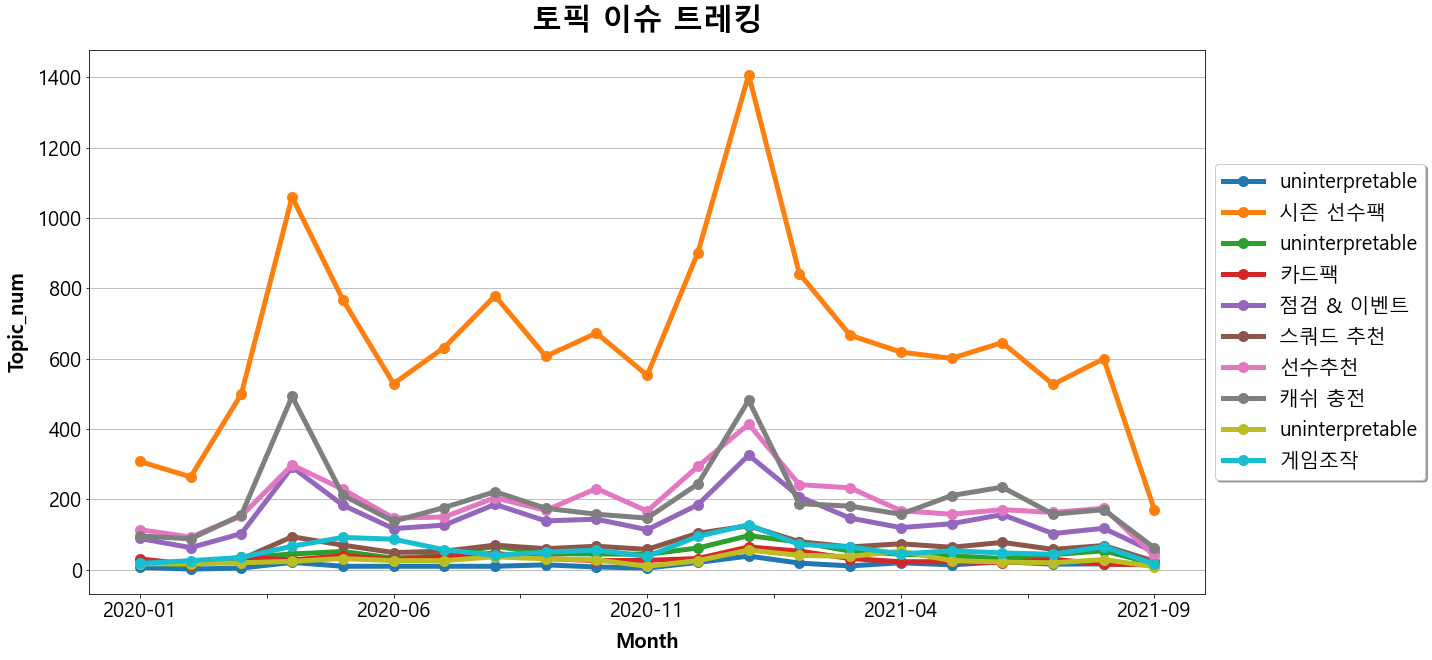

In [30]:
""" 
해당 절에서는 분석한 토픽을 시각화하는 절입니다.
여기서는 선형그래프와 히트맵을 통해 이슈트레킹 과제를 수행합니다.
"""
import matplotlib.pyplot as plt

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic' # 고딕체 사용

SAVE_IMG_PATH = RESULT_SAVE_ISSUETRACKING1    

DF_FINAL.plot(kind='line',
              figsize=(20, 10),
              rot=0,
              fontsize=20,
              marker='o', 
              linestyle='-',
              linewidth = 5,mew=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20,frameon=True, shadow=True)
plt.grid(True, axis='y')

plt.xlabel('Month', labelpad=10, fontdict={'color': 'black', 'weight': 'bold', 'size': 20}) #x축
plt.ylabel('Topic_num', labelpad=10, fontdict={'color': 'black', 'weight': 'bold', 'size': 20}) #y축

plt.xticks(size = 20)
plt.yticks(size = 20)

title_font = {
    'fontsize': 30,
    'fontweight': 'bold'
}
plt.title('토픽 이슈 트레킹', fontdict=title_font, loc='center', pad=20)

plt.savefig(SAVE_IMG_PATH )
